In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
pip install scikit.learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
df=sns.load_dataset('iris')

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [25]:
df=df[df['species'] != 'setosa']

In [27]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [29]:
df['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [33]:
df['species']=df['species'].map({'versicolor':0,'virginica':1})

In [35]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [45]:
df['species'].unique()

array([0, 1], dtype=int64)

In [47]:
X=df.drop('species',axis=1)
y=df['species']

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 50 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


In [105]:
from sklearn.model_selection import GridSearchCV

In [107]:
hyp_param={
    'penalty':["l2"],
    'C':[1,3,5,7,9],
    'max_iter':[100,200,300,400]
}

In [109]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [111]:
classifier=GridSearchCV(estimator=lr,param_grid=hyp_param,scoring='accuracy',cv=5)

In [113]:
classifier

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 3, 5, 7, 9], 'max_iter': [100, 200, 300, 400],
                         'penalty': ['l2']},
             scoring='accuracy')

In [115]:
classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 3, 5, 7, 9], 'max_iter': [100, 200, 300, 400],
                         'penalty': ['l2']},
             scoring='accuracy')

In [116]:
classifier.best_params_

{'C': 7, 'max_iter': 100, 'penalty': 'l2'}

In [119]:
classifier.best_score_

0.9875

In [121]:
y_pred=classifier.predict(X_test)

In [123]:
accuracy=accuracy_score(y_test,y_pred)

In [125]:
accuracy

0.9

In [127]:
cm=confusion_matrix(y_test,y_pred)

In [129]:
print(cm)

[[10  2]
 [ 0  8]]


In [131]:
cr=classification_report(y_test,y_pred)

In [133]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.80      1.00      0.89         8

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



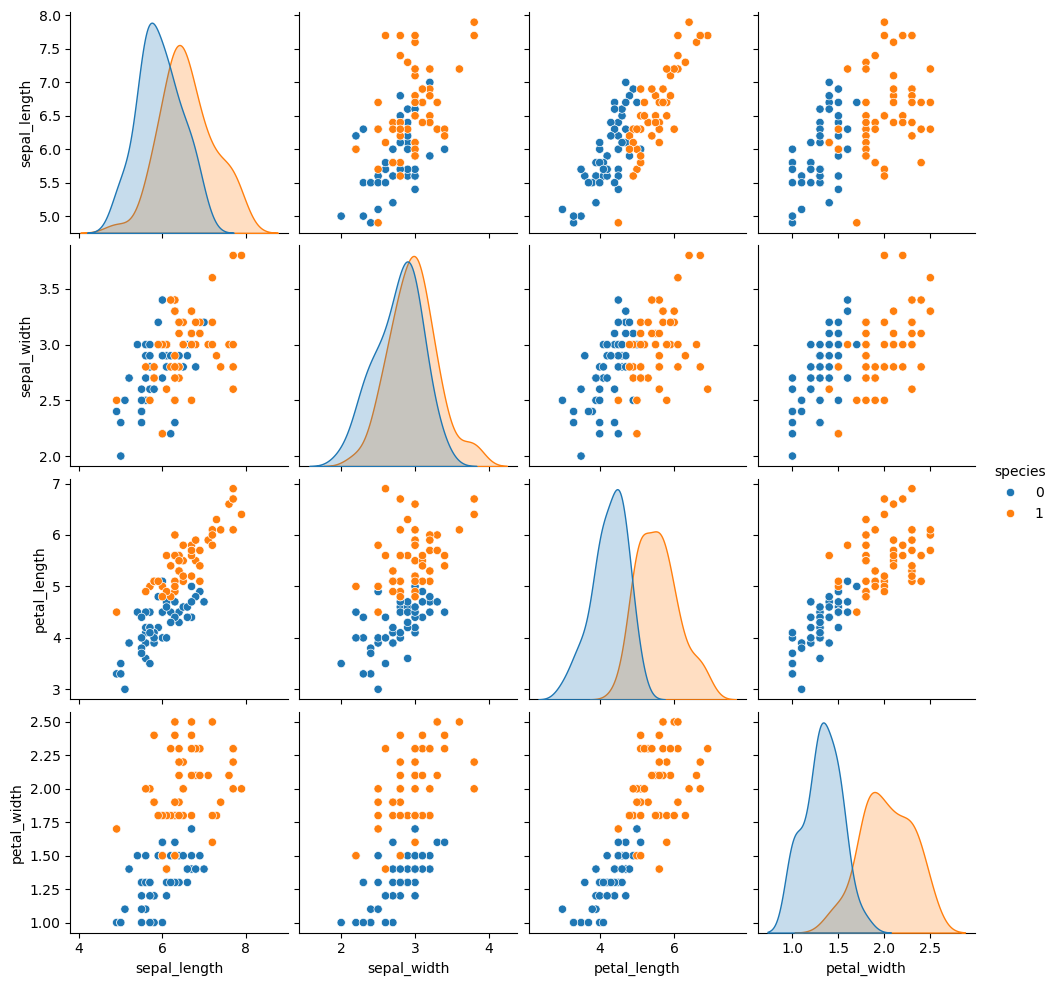

In [135]:
sns.pairplot(df,hue='species')